In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

In [ ]:
covariance = np.array([[0.14, -0.3, 0.0, 0.2],
                       [-0.3, 1.16, 0.2, -0.8],
                       [0.0, 0.2, 1.0, 1.0],
                       [0.2, -0.8, 1.0, 2.0]])
precision = np.linalg.inv(covariance)
print(precision)

[[ 60.   50.  -48.   38. ]
 [ 50.   50.  -50.   40. ]
 [-48.  -50.   52.4 -41.4]
 [ 38.   40.  -41.4  33.4]]


In [ ]:
def generate_pair():
    return np.random.multivariate_normal([0.8, 0.8], [[0.1, -0.1],[-0.1, 0.12]])

mu_t = generate_pair()
print(mu_t)

[0.93474884 0.80350139]


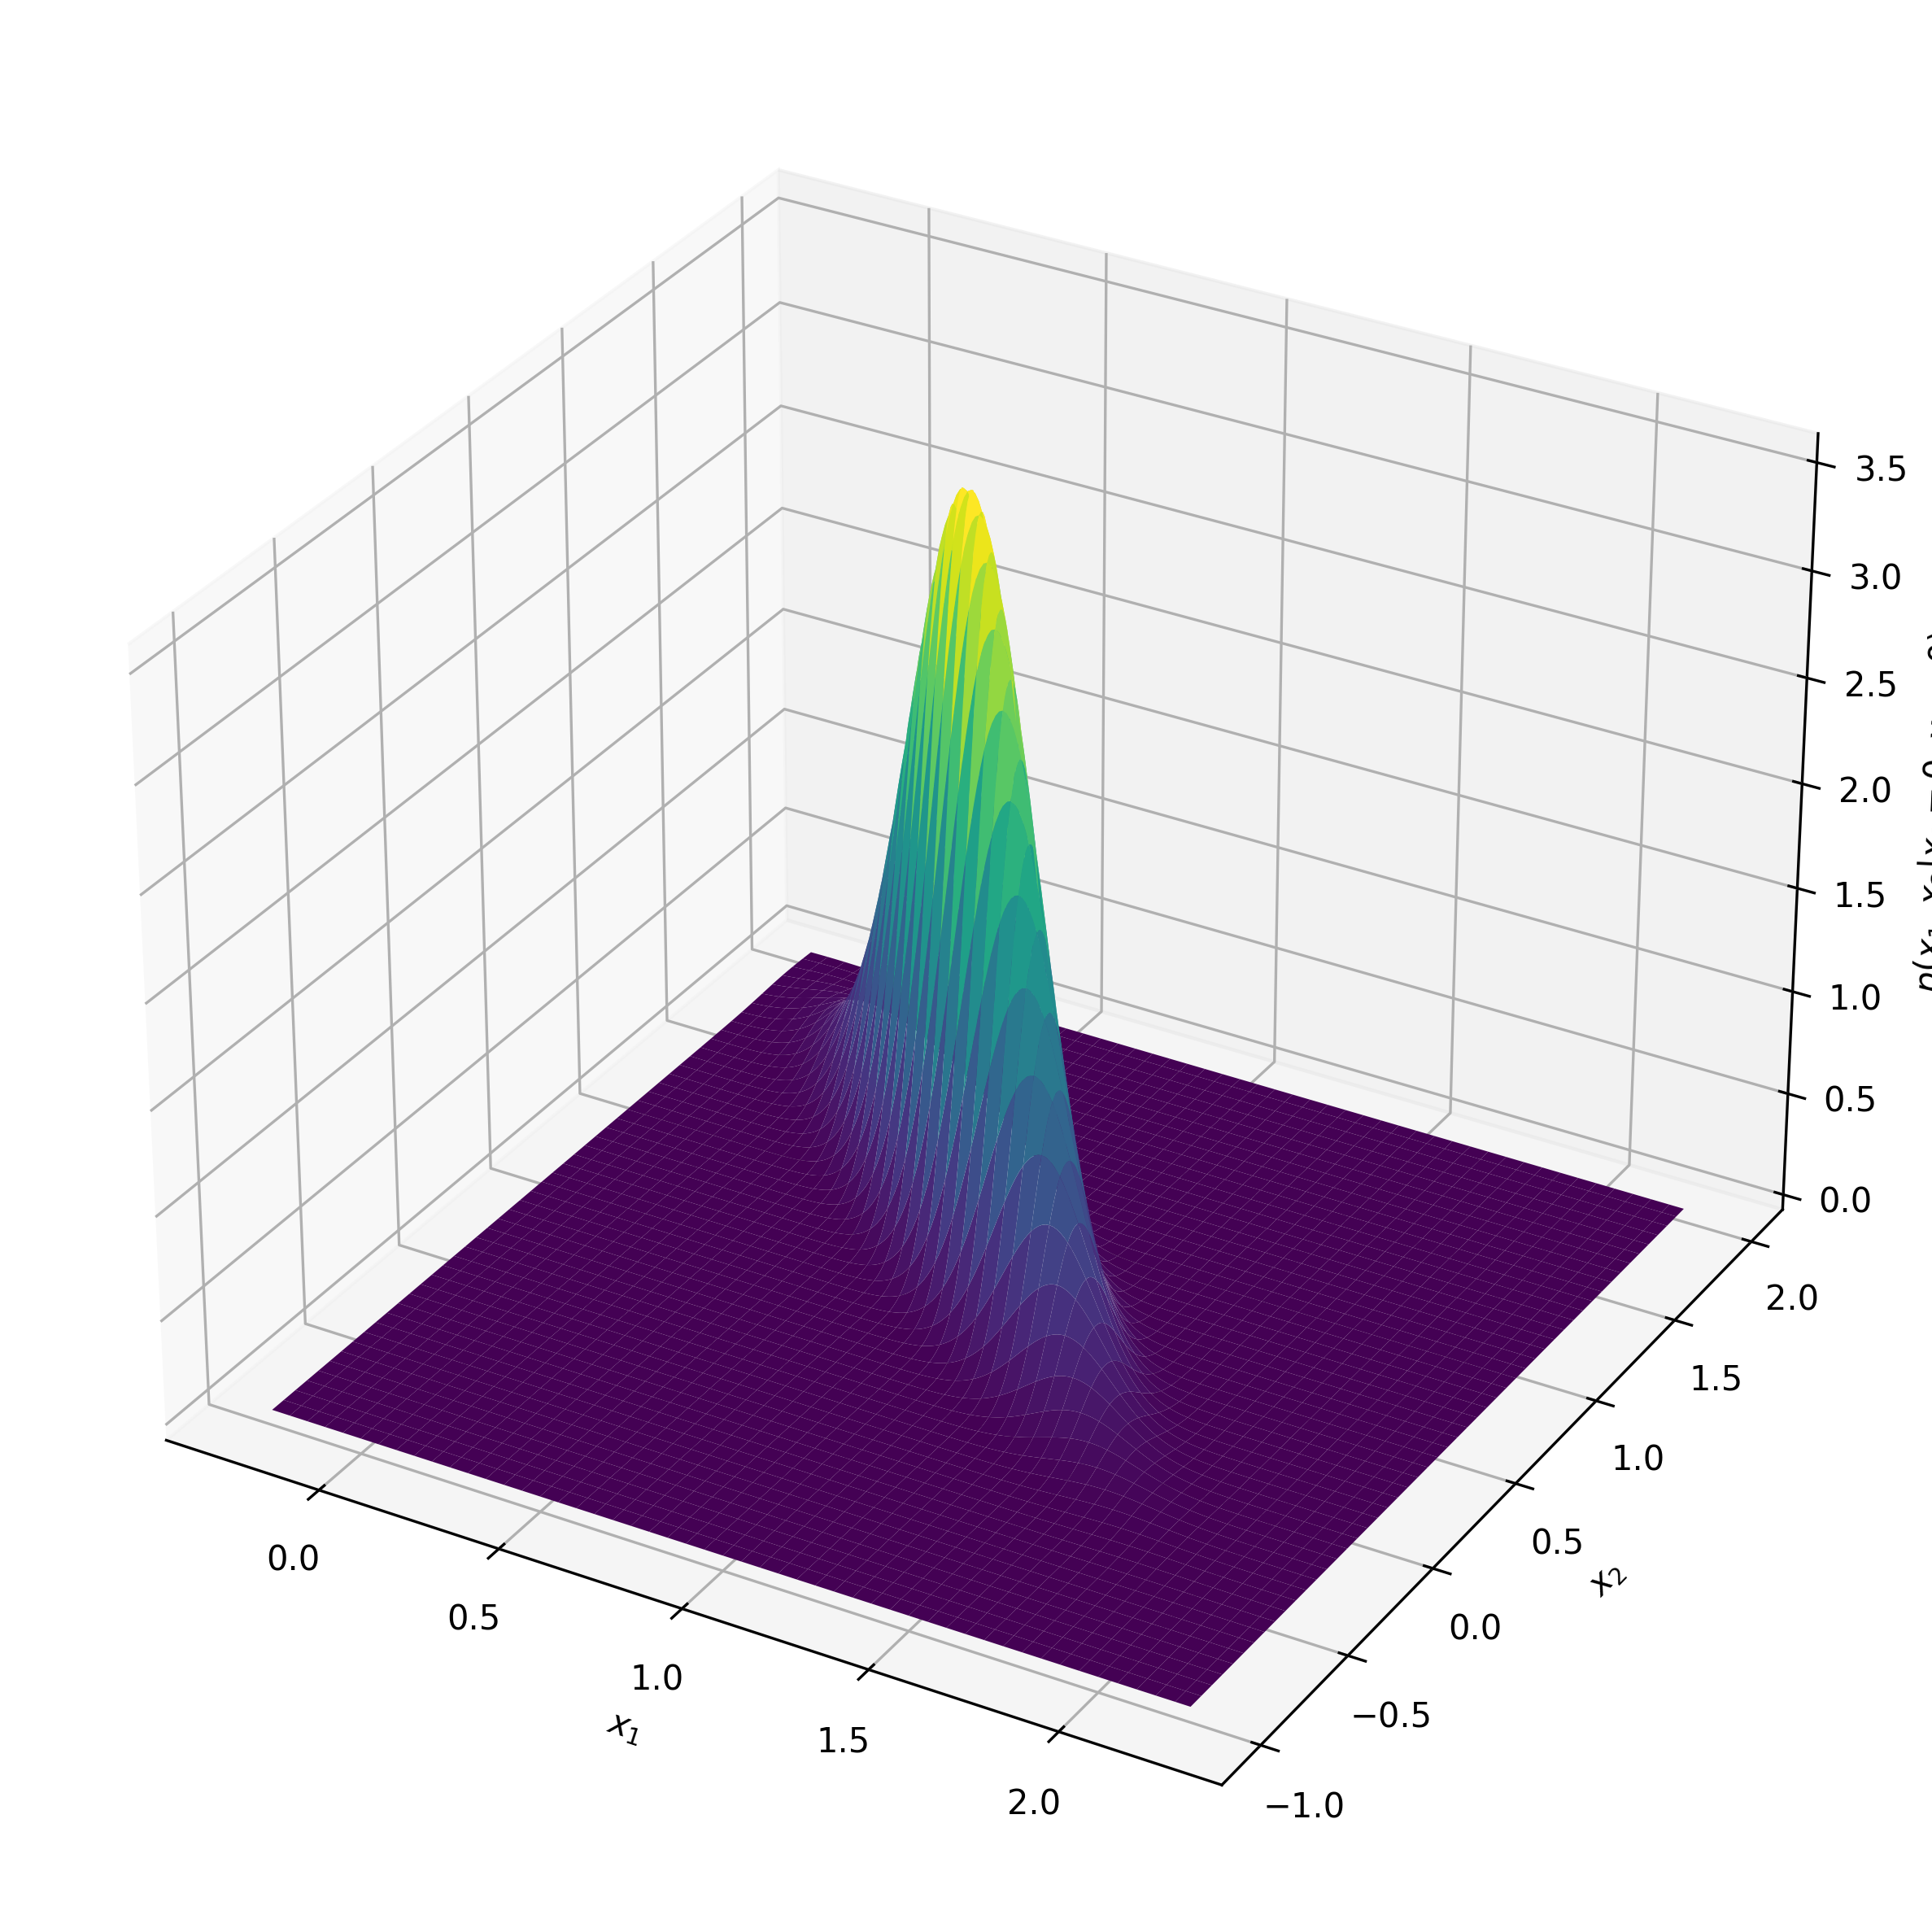

In [ ]:
x, y = np.mgrid[-0.25:2.25:.01,-1:2:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
mu_p = [0.8, 0.8]
cov_p = [[0.1, -0.1], [-0.1, 0.12]]
z = multivariate_normal(mu_p, cov_p).pdf(pos)

fig = plt.figure(figsize=(10, 10), dpi=300)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z, cmap=plt.cm.viridis)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_zlabel('$p(x_1, x_2 | x_3=0, x_4=0)$')
plt.savefig('cond_mvg.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
N = 1000

In [ ]:
import numpy as np
data = np.random.multivariate_normal([0.28, 1.18], [[2.0, 0.8], [0.8, 4.0]], N)
data
np.savetxt('data.txt',data)

In [ ]:
import pandas as pd
data = pd.read_table('data.txt')
data = np.loadtxt('data.txt')
data

array([[-1.97416035,  0.18085742],
       [ 1.89414551, -0.14292725],
       [ 2.44416774, -1.48606541],
       ...,
       [ 2.2292759 ,  0.26630475],
       [-1.50839992, -0.01755483],
       [-1.63801017,  2.59365018]])

In [ ]:
mu_ml = data.mean(axis=0)
x = data - mu_ml
cov_ml = np.dot(x.T, x) / N
cov_ml_unbiased = np.dot(x.T, x) / (N - 1)
print(mu_ml)
print(cov_ml)
print(cov_ml_unbiased)

[0.32950325 1.24389006]
[[2.02971382 0.8557863 ]
 [0.8557863  4.23663802]]
[[2.03174557 0.85664294]
 [0.85664294 4.24087889]]


In [ ]:
def seq_ml(data):
    mus = [np.array([[0], [0]])]
    for i in range(N):
        x_n = data[i].reshape(2, 1)
        mu_n = mus[-1] + (x_n-mus[-1]) / (i + 1)
        mus.append(mu_n)
    return mus


mus_ml = seq_ml(data)
print(mus_ml[-1])

[[0.32950325]
 [1.24389006]]


In [ ]:
mu_p = np.array([[0.28], [1.18]])
cov_p = np.array([[0.1, -0.1], [-0.1, 0.12]])
cov_t = np.array([[2.0, 0.8], [0.8, 4.0]])

def seq_map(data, mu_p, cov_p, cov_t):
    mus, covs = [mu_p], [cov_p]
    for x in data:
        x_n = x.reshape(2, 1)
        cov_n = np.linalg.inv(np.linalg.inv(covs[-1]) + np.linalg.inv(cov_t))
        mu_n = cov_n.dot(np.linalg.inv(cov_t).dot(x_n) + np.linalg.inv(covs[-1]).dot(mus[-1]))
        mus.append(mu_n)
        covs.append(cov_n)

    return mus, covs

mus_map, covs_map = seq_map(data, mu_p, cov_p, cov_t)
print(mus_map[-1])

[[0.31735853]
 [1.22405254]]


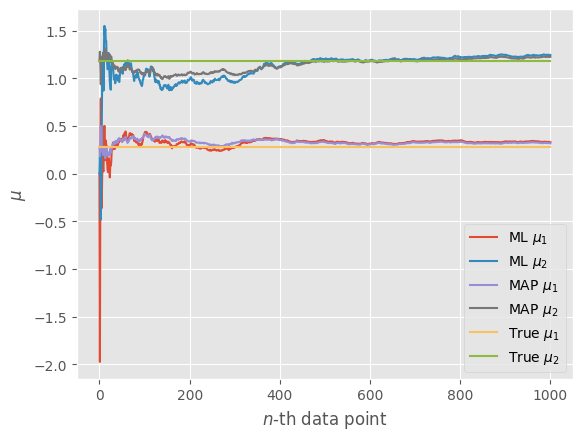

In [ ]:
X = np.arange(N+1)
mus1_ml = [mu[0] for mu in mus_ml]
mus2_ml = [mu[1] for mu in mus_ml]
mus1_map = [mu[0] for mu in mus_map]
mus2_map = [mu[1] for mu in mus_map]
mus1_t = [0.28] * (N+1)
mus2_t = [1.18] * (N+1)
plt.style.use('ggplot')
plt.plot(X, mus1_ml, label='ML $\mu_1$')
plt.plot(X, mus2_ml, label='ML $\mu_2$')
plt.plot(X, mus1_map, label='MAP $\mu_1$')
plt.plot(X, mus2_map, label='MAP $\mu_2$')
plt.plot(X, mus1_t, label='True $\mu_1$')
plt.plot(X, mus2_t, label='True $\mu_2$')
plt.xlabel('$n$-th data point')
plt.ylabel('$\mu$')
plt.legend(loc=4)
plt.savefig('seq_learning.png', bbox_inches='tight', dpi=300)
plt.show()

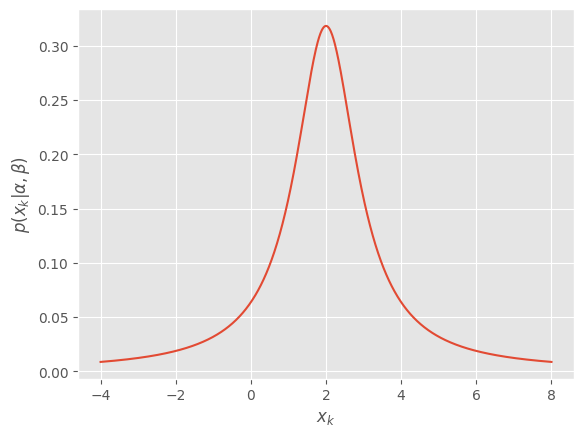

In [ ]:
def p_xk(x, alpha, beta):
    return beta / (np.pi * (beta**2 + (x-alpha)**2))

x = np.linspace(-4, 8, num=1000)
probs = p_xk(x, 2, 1)
plt.plot(x, probs)
plt.xlabel('$x_k$')
plt.ylabel(r'$p(x_k | \alpha, \beta)$')
plt.savefig('prob_xk.png', bbox_inches='tight', dpi=300)
plt.show()

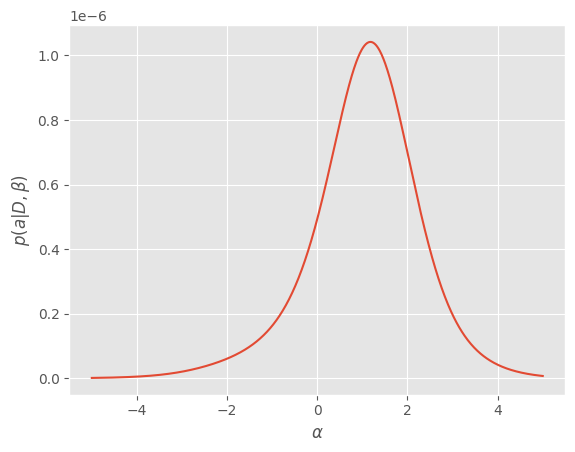

In [ ]:
def p_a(x, alpha, beta):
    return np.product(beta / (np.pi * beta**2 + (x-alpha)**2))

D = np.array([4.8, -2.7, 2.2, 1.1, 0.8, -7.3])
alphas = np.linspace(-5, 5, num=1000)
beta = 1
likelihoods = [p_a(D, alpha, beta) for alpha in alphas]
plt.plot(alphas, likelihoods)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$p(a | D, \beta)$')
plt.savefig('prob_a.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
print(D.mean())
print(alphas[np.argmax(likelihoods)])

-0.18333333333333326
1.1761761761761758


In [ ]:
alpha_t = np.random.uniform(0, 10)
beta_t = np.random.uniform(1, 2)
print(alpha_t, beta_t)

9.556577442054802 1.3712422301299707


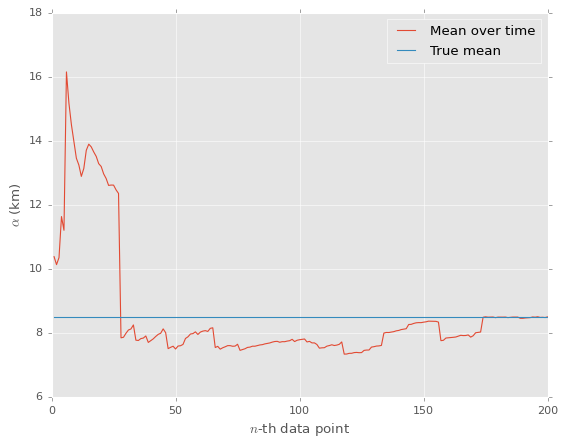

In [ ]:
def location(angle, alpha, beta):
    return beta * np.tan(angle) + alpha

N = 200
angles = np.random.uniform(-np.pi/2, np.pi/2, N)
locations = np.array([location(angle, alpha_t, beta_t) for angle in angles])

mus = [locations[:i + 1].mean() for i in range(N)]
mean = [locations.mean()] * (N)
X = np.arange(1, N + 1)
plt.style.use('ggplot')
plt.plot(X, mus, label='Mean over time')
plt.plot(X, mean, label='True mean')
plt.xlabel('$n$-th data point')
plt.ylabel(r'$\alpha$ (km)')
plt.legend()
plt.savefig('mean_x.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
print(locations.mean())


8.490289536675617


<ipython-input-49-f58e94a921d6>:8: RuntimeWarning: divide by zero encountered in log
  likelihood = k * np.log(betas/np.pi)
/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/proj3d.py:180: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


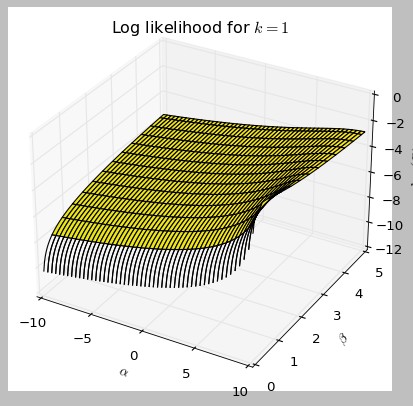

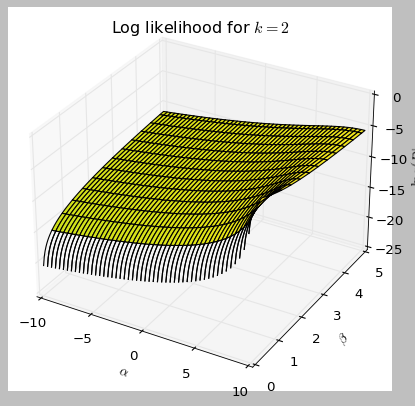

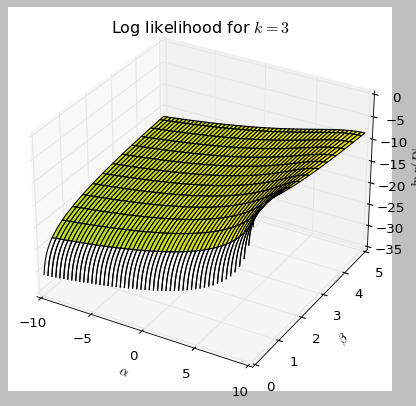

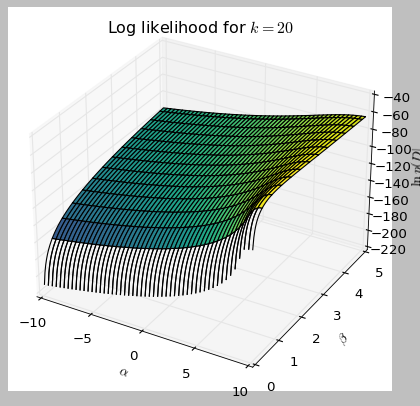

In [ ]:
plt.style.use('classic')
ks = [1, 2, 3, 20]
alphas, betas = np.mgrid[-10:10:0.04, 0:5:0.04]
# alphas, betas = np.meshgrid(np.linspace(-10, 10, num=500), np.linspace(0, 5, num=250))
for k in ks:
    x = locations[:k]
    # We only have to calculate the constant once
    likelihood = k * np.log(betas/np.pi)
    for loc in x:
        likelihood -= np.log(betas**2 + (loc - alphas)**2)

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(alphas, betas, likelihood, cmap=plt.cm.viridis, vmin=-200, vmax=likelihood.max())
    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'$\beta$')
    ax.set_zlabel('$\ln p(D | \alpha, \beta)$')
    plt.title('Log likelihood for $k = {}$'.format(k))
    plt.savefig('logl_{}.png'.format(k), bbox_inches='tight', dpi=300)
    plt.show()


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: 0.898559
         Iterations: 104
         Function evaluations: 197
Optimization terminated successfully.
         Current function value: 2.181169
         Iterations: 86
         Function evaluations: 162
Optimization terminated successfully.
         Current function value: 7.644875
         Iterations: 85
         Function evaluations: 162
Optimization terminated successfully.
         Current function value: 9.410418
         Iterations: 87
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 17.834954
         Iterations: 86
         Function evaluations: 162
Optimization terminated successfully.
         Current function value: 19.446122
         Iterations: 94
         Function evaluations: 177
Optimization terminated s

<ipython-input-45-6a1108c4c769>:5: RuntimeWarning: invalid value encountered in log
  likelihood = len(locations) * np.log(beta/np.pi)
<ipython-input-45-6a1108c4c769>:14: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  [alpha, beta] = fmin(log_likelihood, (0, 1), args=(data[:k],))


Optimization terminated successfully.
         Current function value: 27.014560
         Iterations: 80
         Function evaluations: 150
Optimization terminated successfully.
         Current function value: 32.265839
         Iterations: 85
         Function evaluations: 159
Optimization terminated successfully.
         Current function value: 38.483444
         Iterations: 87
         Function evaluations: 162
Optimization terminated successfully.
         Current function value: 43.508164
         Iterations: 86
         Function evaluations: 163
Optimization terminated successfully.
         Current function value: 46.596925
         Iterations: 98
         Function evaluations: 186
Optimization terminated successfully.
         Current function value: 48.454299
         Iterations: 83
         Function evaluations: 157
Optimization terminated successfully.
         Current function value: 50.244967
         Iterations: 83
         Function evaluations: 155
Optimization termina

FileNotFoundError: ignored

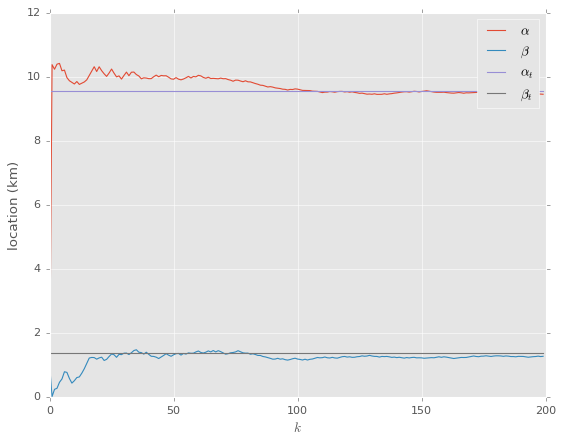

In [ ]:
from scipy.optimize import fmin

def log_likelihood(params, locations):
    alpha, beta = params
    likelihood = len(locations) * np.log(beta/np.pi)
    for loc in locations:
        likelihood -= np.log(beta**2 + (loc - alpha)**2)
    return -likelihood

def plot_maximize_logl(data, alpha_t, beta_t):
    alphas, betas = [], []
    x = np.arange(len(data))
    for k in x:
        [alpha, beta] = fmin(log_likelihood, (0, 1), args=(data[:k],))
        alphas.append(alpha)
        betas.append(beta)

    plt.style.use('ggplot')
    plt.plot(x, alphas, label=r'$\alpha$')
    plt.plot(x ,betas, label=r'$\beta$')
    plt.plot(x, [alpha_t]*len(data), label=r'$\alpha_t$')
    plt.plot(x, [beta_t]*len(data), label=r'$\beta_t$')
    plt.xlabel('$k$')
    plt.ylabel('location (km)')
    plt.legend()
    plt.savefig('plots/min_logl.png', bbox_inches='tight', dpi=300)
    plt.show()

    print(alphas[-1], betas[-1])


plot_maximize_logl(locations, alpha_t, beta_t)


In [ ]:
import pandas as pd
import numpy as np
a=pd.read_csv("train.csv",sep=';')
print(a)
p=a['hour']
m=np.mean(p)
sd=np.std(p)#sigma value
var=np.var(p)#sigma square value
m, sd, var

         id  year  hour  season  holiday  workingday  weather   temp   atemp  \
0         3  2012    23       3        0           0        2  23.78  27.275   
1         4  2011     8       3        0           0        1  27.88  31.820   
2         5  2012     2       1        0           1        1  20.50  24.240   
3         7  2011    20       3        0           1        3  25.42  28.790   
4         8  2011    17       3        0           1        3  26.24  28.790   
...     ...   ...   ...     ...      ...         ...      ...    ...     ...   
7684  10882  2012    18       1        0           1        1  13.94  15.150   
7685  10883  2012     3       1        0           1        1   9.02  11.365   
7686  10884  2012    15       2        0           0        1  21.32  25.000   
7687  10885  2011    19       4        0           1        1  12.30  14.395   
7688  10886  2012    21       3        0           1        1  30.34  34.850   

      humidity  windspeed  count  
0   

(11.56535310183379, 6.915326938018648, 47.82174665968637)

In [ ]:
t=np.array(a['temp'])
tm=np.mean(t)
tsd=np.std(t)#sigma value/std.dev
tvar=np.var(t)#variance
x=29
l=np.log(np.sqrt(2*3.14))
e=np.log(tsd) #std.dev
f=(x-tm)**2 #mean
g=2*(tvar**2) #variance
h=f/g
i=-l-e
print(i-h)

-2.9860025235468406


In [ ]:
import pandas as pd
import numpy as np
a=pd.read_csv("test.csv",sep=';')
print(a)
p=a['hour']
m=np.mean(p)
sd=np.std(p)#sigma value
var=np.var(p)#sigma square value
m, sd, var

      Unnamed: 0  year  hour  season  holiday  workingday  weather   temp  \
0              1  2012    21       3        0           0        1  29.52   
1              2  2012     3       2        0           0        1  23.78   
2              6  2011    10       1        0           1        3  16.40   
3             14  2012    19       1        0           1        1  13.94   
4             17  2011    23       3        0           1        2  26.24   
...          ...   ...   ...     ...      ...         ...      ...    ...   
3191       10868  2012     9       4        0           1        1  16.40   
3192       10871  2011    12       4        0           1        3  18.04   
3193       10872  2011    19       3        0           1        1  30.34   
3194       10873  2012     0       4        0           1        2  13.12   
3195       10874  2012    10       1        0           1        3  12.30   

       atemp  humidity  windspeed  
0     34.850        79     6.0032  
1  

(11.482478097622028, 6.915772969192248, 47.82791576141015)

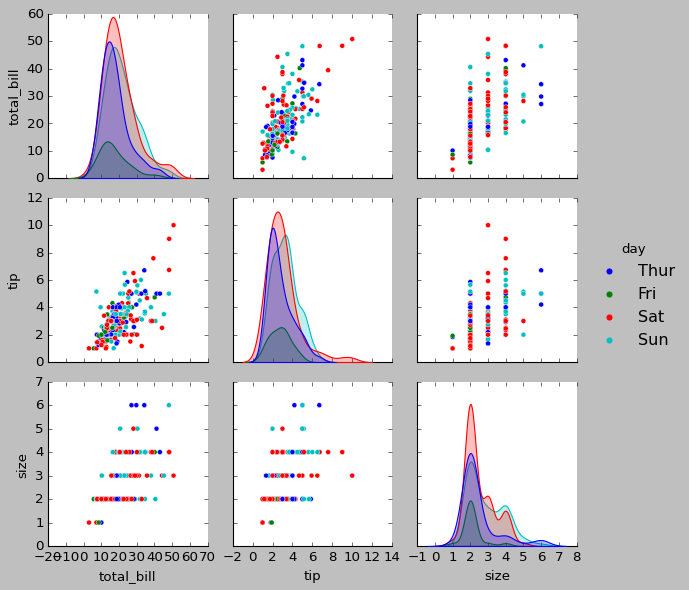

In [ ]:
import seaborn
import matplotlib.pyplot as plt
df = seaborn.load_dataset('tips')
seaborn.pairplot(df, hue='day')
plt.show()
